In [14]:
#数据查看
import numpy as np
import pandas as pd
data = pd.read_csv('./Telco-Customer-Churn.csv')
pd.set_option('display.max_columns',None)
data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [15]:
#重复值缺省值处理
#shape[0]获取数据集中总行数
#drop_duplicates()：返回一个去掉重复行的新数据集
dupNum = data.shape[0]-data.drop_duplicates().shape[0]
print(dupNum)
# .isnull()：这个方法返回一个同样大小的布尔型 DataFrame，其中缺失值的位置为 True，其他位置为 False
# .any()：这个方法用于检查每一列（或行）是否至少有一个 True 值。如果至少有一个缺失值，则返回 True，否则返回 False
data.isnull().any()

0


customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

In [18]:
#存在以空格代替的缺省值
data[data["TotalCharges"]==" "]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [17]:
# 在原位替换缺省值
data.replace(' ',np.NaN,inplace=True)
data["TotalCharges"] = pd.to_numeric(data["TotalCharges"],errors = 'coerce')

In [19]:
print("此时TotalCharges是否已经转换为浮点型：", data['TotalCharges'].dtype == 'float')
print("此时TotalCharges存在%s行缺失样本。" % data['TotalCharges'].isnull().sum())

此时TotalCharges是否已经转换为浮点型： True
此时TotalCharges存在11行缺失样本。


In [20]:
# 这些样本对应的客户可能入网当月就流失了，但仍然要收取当月的费用，因此总费用即为该用户的每月费用（MonthlyCharges）
# 用MonthlyCharges的数值填充TotalCharges的缺失值
data['TotalCharges'] = data['TotalCharges'].fillna(data['MonthlyCharges'])    

data[data['tenure'] == 0][['MonthlyCharges', 'TotalCharges']]    # 观察处理后缺失值变化情况

,MonthlyCharges,TotalCharges
488,52.55,52.55
753,20.25,20.25
936,80.85,80.85
1082,25.75,25.75
1340,56.05,56.05
3331,19.85,19.85
3826,25.35,25.35
4380,20.00,20.00
5218,19.70,19.70
6670,73.35,73.35


In [21]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.798992
std,0.368612,24.559481,30.090047,2266.730170
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


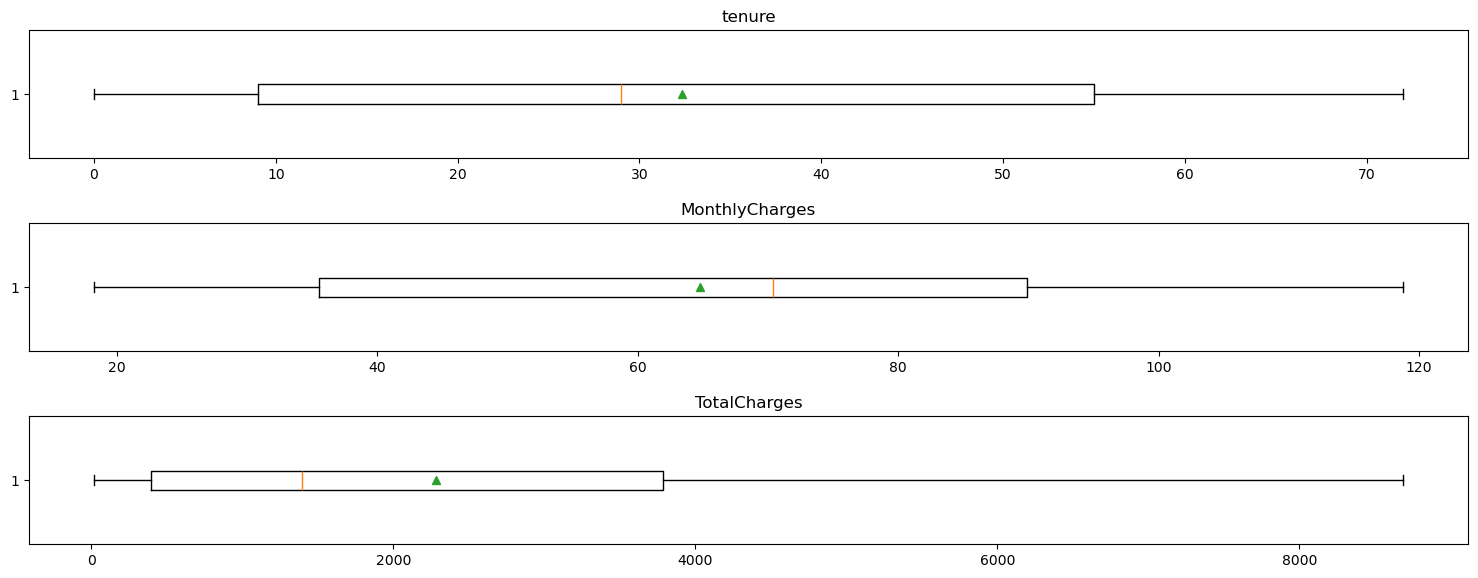

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 分析百分比特征
fig = plt.figure(figsize=(15,6))# 分析百分比特征

# vert=False：表示箱线图是水平绘制的
# showmeans=True：在箱线图中显示均值
# flierprops：自定义异常值点的样式，这里设置异常值的标记为圆形，填充颜色为钢蓝色

# tenure特征
ax1 = fig.add_subplot(311)    # 子图1
list1 = list(data['tenure'])
ax1.boxplot(list1, vert=False, showmeans=True, flierprops = {"marker":"o","markerfacecolor":"steelblue"})
ax1.set_title('tenure')

# MonthlyCharges特征
ax2 = fig.add_subplot(312)    # 子图2
list2 = list(data['MonthlyCharges'])
ax2.boxplot(list2, vert=False, showmeans=True, flierprops = {"marker":"o","markerfacecolor":"steelblue"})
ax2.set_title('MonthlyCharges')

# TotalCharges
ax3 = fig.add_subplot(313)    # 子图3
list3 = list(data['TotalCharges'])
ax3.boxplot(list3, vert=False, showmeans=True, flierprops = {"marker":"o","markerfacecolor":"steelblue"})
ax3.set_title('TotalCharges')

plt.tight_layout(pad=1.5)    # 设置子图之间的间距
plt.show() # 展示箱型图

# 由箱型图直观可见，这三列数值特征均不含离群点（即异常值）。同时，其他类别特征的取值也未见异常，因此不需要进行异常值处理